In [10]:
import SITSpinOneMFT as sit
import SIT_noise_plaquette as plaq
import numpy as np 
from scipy import integrate as intg
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors as mclr


In [2]:
Lx = 15
Ly = 15
Ej = 1.
Ec = sit.xymodel.generate_Ec_disorder(Lx,Ly,3.,3.05)

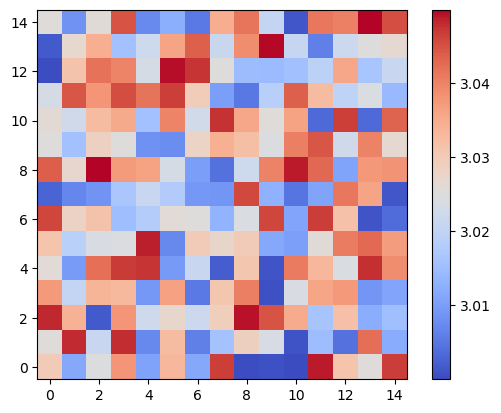

In [202]:
plt.imshow(Ec,origin='lower',cmap='coolwarm')
plt.colorbar()
plt.show()

In [203]:
model = sit.xymodel(Lx,Ly,Ej,Ec)

In [204]:
dt = model.find_GS(niter=4,stepsize=0.1)

In [205]:
print(dt)

67.21806788444519


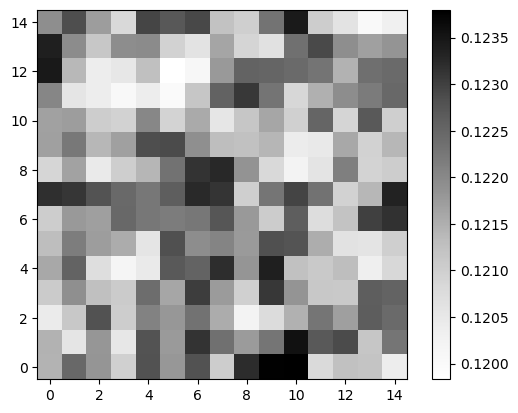

In [206]:
plt.imshow(sit.xymodel.charge_squared(model.gs_wf),origin='lower',cmap='Greys')
plt.colorbar()
plt.show()

In [207]:
flux = 2.3
echo_times = np.array([0.,10.,20.])
nsample = 300
sample_times = np.linspace(-2.,echo_times[-1]+5.,nsample)

In [208]:
echo = sit.xyecho(model,echo_times,flux,sample_times)
echo.calc_echo()

In [209]:
c2_vs_t = sit.xymodel.charge_squared(echo.wf)
m_vs_t = sit.xymodel.magnetization(echo.wf)


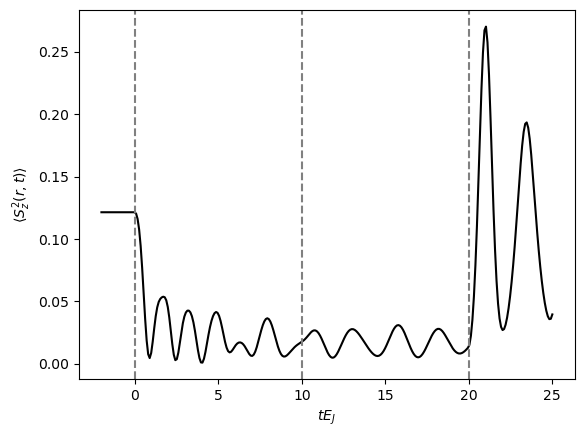

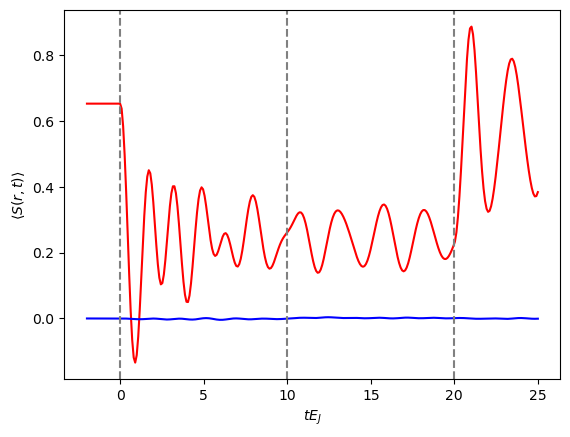

In [210]:
plt.plot(echo.sample_times,c2_vs_t[0,0,:],color='black')
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_z^2(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.show()

plt.plot(echo.sample_times,m_vs_t[1,0,0,:],color='red')
plt.plot(echo.sample_times,m_vs_t[2,0,0,:],color='blue')
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.show()

In [211]:
flux = 2.3
echo_times = np.array([0.,1.,20.])
nsample = 300
sample_times = np.linspace(-2.,echo_times[-1]+5.,nsample)

In [212]:
echo = sit.xyecho(model,echo_times,flux,sample_times)
echo.calc_echo()

In [213]:
c2_vs_t = sit.xymodel.charge_squared(echo.wf)
m_vs_t = sit.xymodel.magnetization(echo.wf)


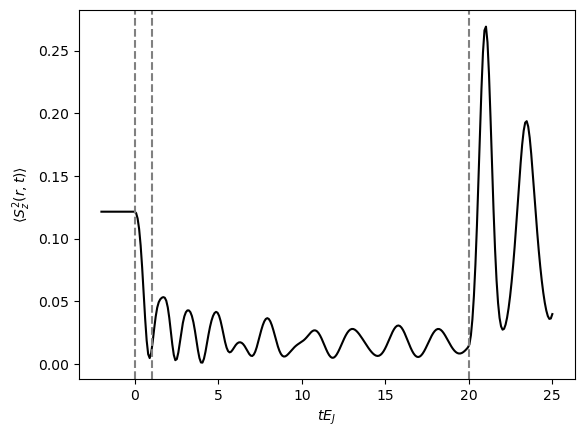

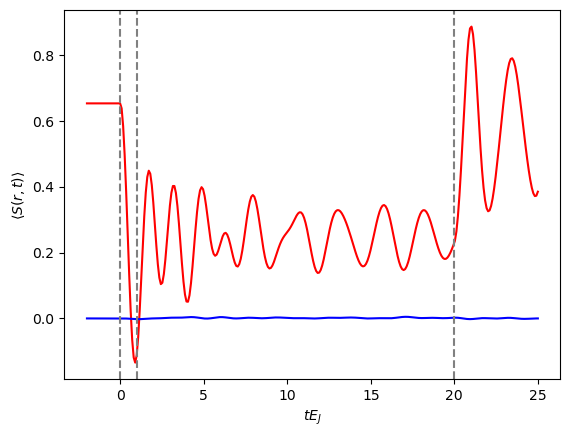

In [214]:
plt.plot(echo.sample_times,c2_vs_t[0,0,:],color='black')
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_z^2(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.show()

plt.plot(echo.sample_times,m_vs_t[1,0,0,:],color='red')
plt.plot(echo.sample_times,m_vs_t[2,0,0,:],color='blue')
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.show()

In [157]:
hahn_echo_p = sit.xyecho(model,echo_times,flux,sample_times)
hahn_echo_m = sit.xyecho(model,echo_times,-flux,sample_times)

In [158]:
hahn_echo_p.calc_echo()
hahn_echo_m.calc_echo()

In [159]:
c2_vs_t_p = sit.xymodel.charge_squared(hahn_echo_p.wf)
m_vs_t_p = sit.xymodel.magnetization(hahn_echo_p.wf)
c2_vs_t_m = sit.xymodel.charge_squared(hahn_echo_m.wf)
m_vs_t_m = sit.xymodel.magnetization(hahn_echo_m.wf)

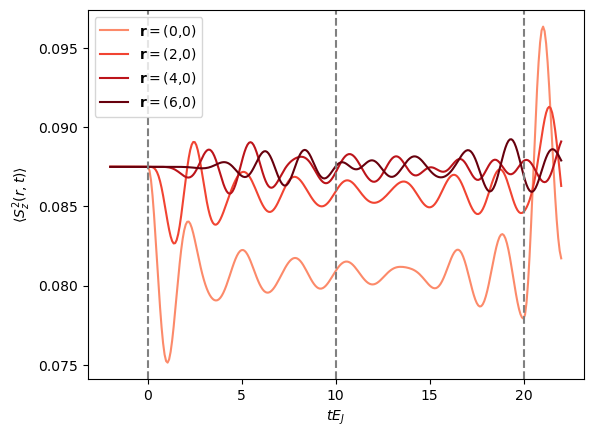

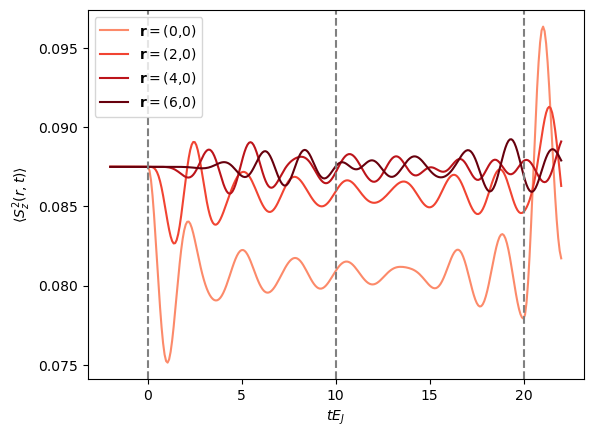

In [160]:
sites = [[0,0],[2,0],[4,0],[6,0]]
clrs = cm.Reds(np.linspace(0.4,1.,len(sites)))
for i in range(len(sites)):
    plt.plot(hahn_echo_p.sample_times,c2_vs_t_p[sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_z^2(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.legend()
plt.show()

for i in range(len(sites)):
    plt.plot(hahn_echo_m.sample_times,c2_vs_t_m[sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_z^2(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.legend()
plt.show()

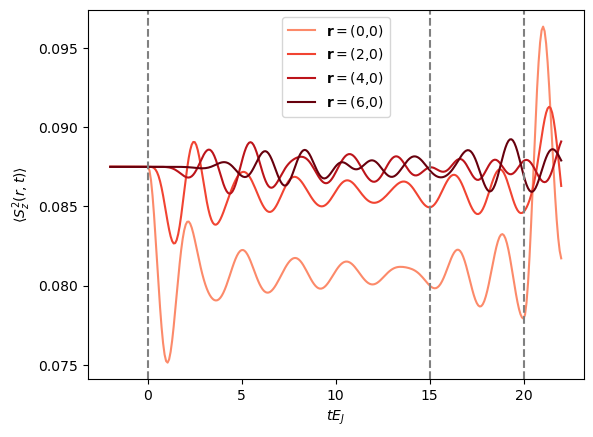

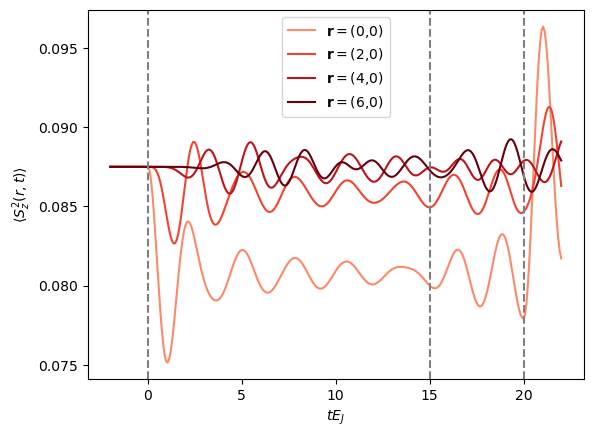

In [155]:
sites = [[0,0],[2,0],[4,0],[6,0]]
clrs = cm.Reds(np.linspace(0.4,1.,len(sites)))
for i in range(len(sites)):
    plt.plot(hahn_echo_p.sample_times,c2_vs_t_p[sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_z^2(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.legend()
plt.show()

for i in range(len(sites)):
    plt.plot(hahn_echo_m.sample_times,c2_vs_t_m[sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_z^2(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.legend()
plt.show()


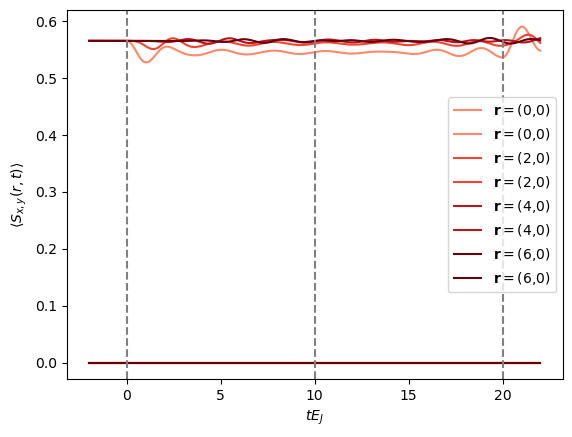

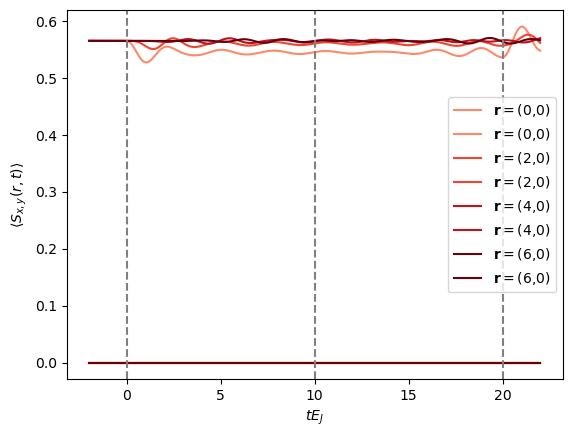

In [150]:
for i in range(len(sites)):
    plt.plot(hahn_echo_p.sample_times,m_vs_t_p[1,sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
    plt.plot(hahn_echo_p.sample_times,m_vs_t_p[2,sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_{x,y}(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.legend()
plt.show()

for i in range(len(sites)):
    plt.plot(hahn_echo_m.sample_times,m_vs_t_m[1,sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
    plt.plot(hahn_echo_m.sample_times,m_vs_t_m[2,sites[i][0],sites[i][1],:],label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle S_{x,y}(r,t)\rangle$')
for i in range(len(echo_times)):
    plt.axvline(echo_times[i],linestyle='dashed',color='gray')
plt.legend()
plt.show()

In [60]:
Loschmidt_echo = np.prod(sit.xymodel.overlap(hahn_echo_p.wf,hahn_echo_m.wf),axis=(0,1))

(300,)

In [61]:
loschmidt_echo_single_site = sit.xymodel.overlap(hahn_echo_p.wf,hahn_echo_m.wf)

In [62]:
loschmidt_echo_single_site.shape

(6, 6, 300)

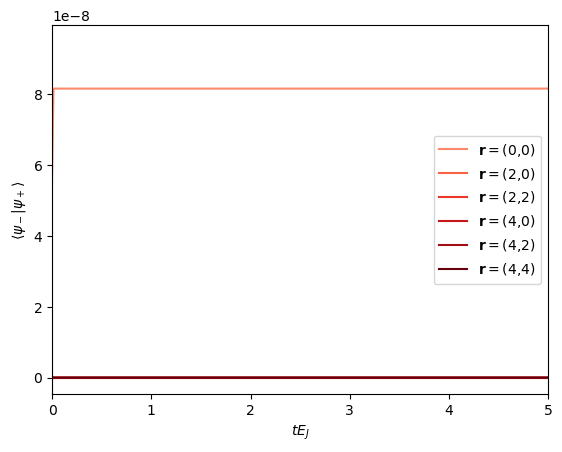

In [63]:
sites = [[0,0],[2,0],[2,2],[4,0],[4,2],[4,4]]
clrs = cm.Reds(np.linspace(0.4,1.,len(sites)))
for i in range(len(sites)):
    plt.plot(hahn_echo_p.sample_times,np.abs(loschmidt_echo_single_site[sites[i][0],sites[i][1],:])-1.,label=r'$\mathbf{r}=($'+str(sites[i][0])+","+str(sites[i][1])+r'$)$',color=clrs[i])
plt.xlabel(r'$tE_J$')
plt.ylabel(r'$\langle \psi_-|\psi_+\rangle$')
plt.axvline(echo_times[0],linestyle='dashed',color='gray')
plt.axvline(echo_times[1],linestyle='dashed',color='gray')
#plt.axvline(echo_times[2],linestyle='dashed',color='gray')
plt.xlim(0.,5.)
plt.legend()
plt.show()

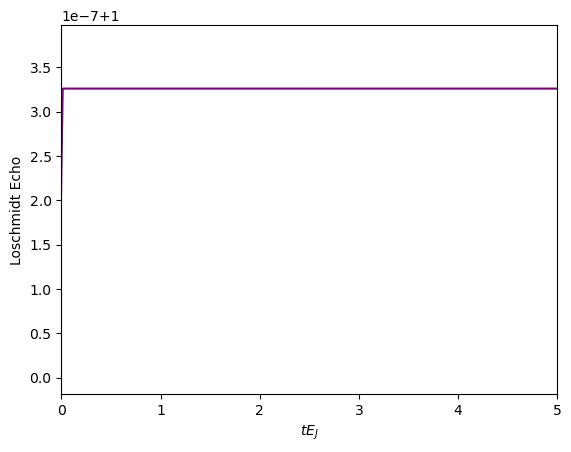

In [64]:
plt.plot(sample_times,np.abs(Loschmidt_echo),color='purple')
plt.xlabel(r'$tE_J$')
plt.ylabel(r'Loschmidt Echo')
plt.axvline(echo_times[0],linestyle='dashed',color='gray')
plt.axvline(echo_times[1],linestyle='dashed',color='gray')
plt.xlim(0.,5.)
#plt.axvline(echo_times[2],linestyle='dashed',color='gray')
plt.show()

In [32]:
Ej = 1.
Ec = 3.3
flux = 2.3

echo_times = np.array([0.,10.,20.])
nts = 200
sample_times = np.linspace(echo_times[0]-2.,echo_times[-1]+2.,nts)

In [36]:
wf_p = plaq.evolve_quench(Ec,Ej,echo_times,flux,sample_times)
wf_m = plaq.evolve_quench(Ec,Ej,echo_times,-flux,sample_times)

In [34]:
sx = np.real( np.sum(np.conjugate(wf)*np.tensordot(plaq.S[0][1],wf,axes=[1,0]),axis=(0)) )
sy = np.real( np.sum(np.conjugate(wf)*np.tensordot(plaq.S[0][2],wf,axes=[1,0]),axis=(0)) )
c2 = np.real( np.sum(np.conjugate(wf)*np.tensordot(plaq.S[0][3]@plaq.S[0][3],wf,axes=[1,0]),axis=(0)) )

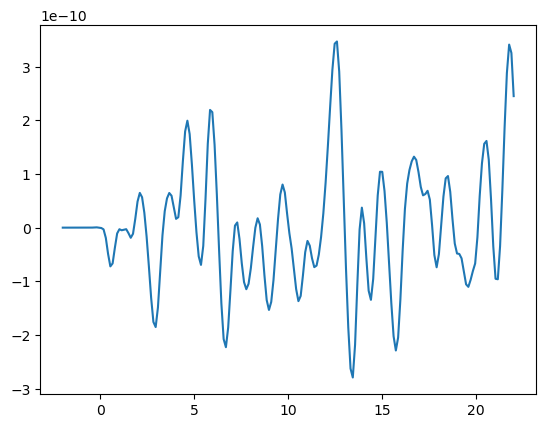

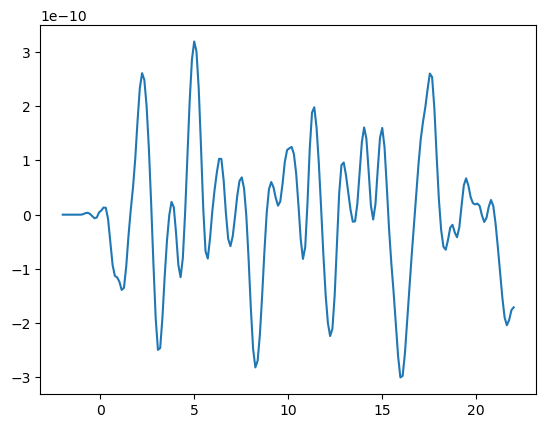

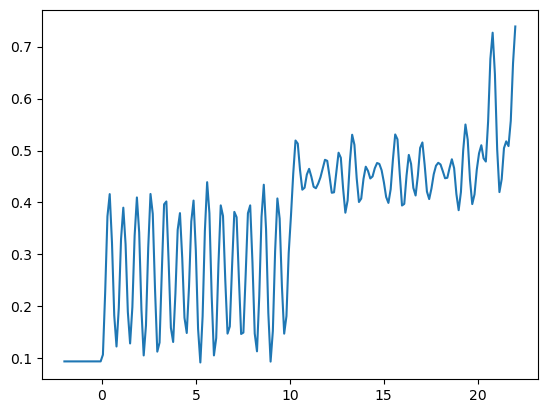

In [35]:
plt.plot(sample_times,sx)
plt.show()
plt.plot(sample_times,sy)
plt.show()
plt.plot(sample_times,c2)
plt.show()

In [37]:
overlap = np.sum(np.conjugate(wf_m)*wf_p,axis=(0))

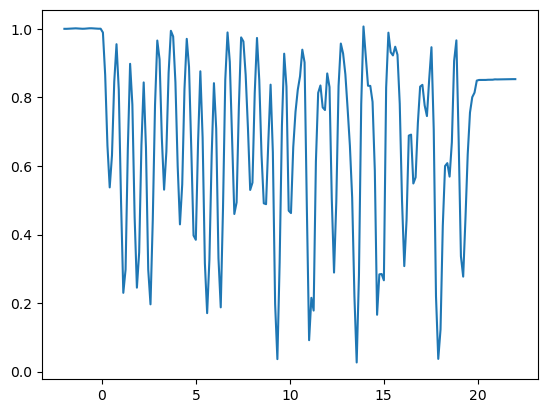

In [38]:
plt.plot(sample_times,np.abs(overlap))
plt.show()

In [1]:
import QMC_square as qmc
import SITSpinOneMFT as sit
import numpy as np 
from scipy import integrate as intg
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors as mclr


In [2]:
EJ = 1.
EC = 0.01
T = 0.1
L = 10
M = 10

nburn = 10000
nsample = 1
nstep = 1
sim = qmc.QMC(EJ,EC,T,L,M)
sim.set_sampling(nburn,nsample,nstep)

sim.burn()
sim.sample()

    

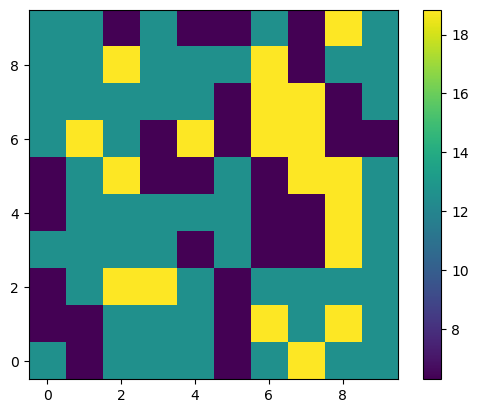

In [3]:
plt.imshow(sim.vort_samples[...,0,0],origin='lower')
plt.colorbar()
plt.show()